## Homework
---
The goal of this homework is to get familiar with MLflow, the tool for experiment tracking and model management.

## Q1. Install MLflow
---
To get started with MLflow you'll need to install the MLflow Python package.

For this we recommend creating a separate Python environment, for example, you can use conda environments, and then install the package there with pip or conda.

Once you installed the package, run the command mlflow --version and check the output.

What's the version that you have?

In [1]:
! mlflow --version

mlflow, version 2.22.0


In [2]:
import pandas as pd
import mlflow

## Q2. Download and preprocess the data
---
We'll use the Green Taxi Trip Records dataset to predict the duration of each trip.

Download the data for January, February and March 2023 in parquet format from [here](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page).

Use the script preprocess_data.py located in the folder homework to preprocess the data.

The script will:

* load the data from the folder <TAXI_DATA_FOLDER> (the folder where you have downloaded the data),
* fit a DictVectorizer on the training set (January 2023 data),
* save the preprocessed datasets and the DictVectorizer to disk.

Your task is to download the datasets and then execute this command:


```python
python preprocess_data.py --raw_data_path <TAXI_DATA_FOLDER> --dest_path ./output
```

Tip: go to 02-experiment-tracking/homework/ folder before executing the command and change the value of <TAXI_DATA_FOLDER> to the location where you saved the data.

How many files were saved to OUTPUT_FOLDER?

* ~~1~~
* ~~3~~
* **4**
* ~~7~~

In [3]:
! ls -al ../data

total 4596
drwxr-xr-x 1 Gleb None       0 May 23 06:00 .
drwxr-xr-x 1 Gleb None       0 May 23 05:32 ..
-rw-r--r-- 1 Gleb None 1427002 May 23 05:51 green_tripdata_2023-01.parquet
-rw-r--r-- 1 Gleb None 1533740 May 23 05:51 green_tripdata_2023-02.parquet
-rw-r--r-- 1 Gleb None 1730999 May 23 05:51 green_tripdata_2023-03.parquet
drwxr-xr-x 1 Gleb None       0 May 23 05:55 output


In [4]:
! ls -al ./homework

total 20
drwxr-xr-x 1 Gleb None    0 May 18 01:40 .
drwxr-xr-x 1 Gleb None    0 May 25 21:59 ..
-rw-r--r-- 1 Gleb None 1906 May 23 05:19 hpo.py
-rw-r--r-- 1 Gleb None 2593 May 23 05:19 preprocess_data.py
-rw-r--r-- 1 Gleb None 2583 May 23 05:19 register_model.py
-rw-r--r-- 1 Gleb None  909 May 23 06:14 train.py


In [5]:
! python ./homework/preprocess_data.py --raw_data_path ../data --dest_path ../data/output

In [6]:
! ls -al ../data/output/

total 7020
drwxr-xr-x 1 Gleb None       0 May 23 05:55 .
drwxr-xr-x 1 Gleb None       0 May 23 06:00 ..
-rw-r--r-- 1 Gleb None  131004 May 25 21:59 dv.pkl
-rw-r--r-- 1 Gleb None 2458697 May 25 21:59 test.pkl
-rw-r--r-- 1 Gleb None 2374517 May 25 21:59 train.pkl
-rw-r--r-- 1 Gleb None 2215823 May 25 21:59 val.pkl


## Q3. Train a model with autolog
---
We will train a `RandomForestRegressor` (from Scikit-Learn) on the taxi dataset.

We have prepared the training script `train.py` for this exercise, which can be also found in the folder `homework`.

The script will:

* load the datasets produced by the previous step,
* train the model on the training set,
* calculate the RMSE score on the validation set.

Your task is to modify the script to enable autologging with MLflow, execute the script and then launch the MLflow UI to check that the experiment run was properly tracked.

Tip 1: don't forget to wrap the training code with a `with mlflow.start_run():` statement as we showed in the videos.

Tip 2: don't modify the hyperparameters of the model to make sure that the training will finish quickly.

What is the value of the `min_samples_split` parameter:

* **2**
* ~~4~~
* ~~8~~
* ~~10~~

In [22]:
! python ./homework/train.py --data_path ../data/output

2025/05/25 22:01:30 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [23]:
client = mlflow.client.MlflowClient()
client

In [24]:
experiments = client.search_experiments()
experiments

[<Experiment: artifact_location='file:///c:/Users/Gleb/work/courses/2025-05-12_mlops-course/mlops-zoomcamp-homework/02-experiment-tracking/mlruns/0', creation_time=1748199690569, experiment_id='0', last_update_time=1748199690569, lifecycle_stage='active', name='Default', tags={}>]

In [25]:
runs = client.search_runs(experiment_ids='0')
len(runs), runs[0]

(1,
 <Run: data=<RunData: metrics={'training_mean_absolute_error': 3.4244701942312354,
  'training_mean_squared_error': 27.083054499499358,
  'training_r2_score': 0.6673983775155525,
  'training_root_mean_squared_error': 5.204138209108148,
  'training_score': 0.6673983775155525}, params={'bootstrap': 'True',
  'ccp_alpha': '0.0',
  'criterion': 'squared_error',
  'max_depth': '10',
  'max_features': '1.0',
  'max_leaf_nodes': 'None',
  'max_samples': 'None',
  'min_impurity_decrease': '0.0',
  'min_samples_leaf': '1',
  'min_samples_split': '2',
  'min_weight_fraction_leaf': '0.0',
  'monotonic_cst': 'None',
  'n_estimators': '100',
  'n_jobs': 'None',
  'oob_score': 'False',
  'random_state': '0',
  'verbose': '0',
  'warm_start': 'False'}, tags={'estimator_class': 'sklearn.ensemble._forest.RandomForestRegressor',
  'estimator_name': 'RandomForestRegressor',
  'mlflow.log-model.history': '[{"run_id": "032f499917174007839634151a760bb7", '
                              '"artifact_path":

In [26]:
runs[0].to_dictionary().keys()

dict_keys(['info', 'data', 'inputs'])

In [27]:
for k in runs[0].to_dictionary().keys():
    print(runs[0].to_dictionary()[k].keys())

dict_keys(['artifact_uri', 'end_time', 'experiment_id', 'lifecycle_stage', 'run_id', 'run_name', 'run_uuid', 'start_time', 'status', 'user_id'])
dict_keys(['metrics', 'params', 'tags'])
dict_keys(['dataset_inputs'])


In [28]:
runs[0].to_dictionary()['info']

{'artifact_uri': 'file:///c:/Users/Gleb/work/courses/2025-05-12_mlops-course/mlops-zoomcamp-homework/02-experiment-tracking/mlruns/0/032f499917174007839634151a760bb7/artifacts',
 'end_time': 1748199723174,
 'experiment_id': '0',
 'lifecycle_stage': 'active',
 'run_id': '032f499917174007839634151a760bb7',
 'run_name': 'respected-swan-305',
 'run_uuid': '032f499917174007839634151a760bb7',
 'start_time': 1748199691405,
 'status': 'FINISHED',
 'user_id': 'Gleb'}

In [29]:
runs[0].to_dictionary()['inputs']

{'dataset_inputs': [{'dataset': {'name': 'dataset',
    'digest': '7edda543',
    'source_type': 'code',
    'source': '{"tags": {"mlflow.user": "Gleb", "mlflow.source.name": "./homework/train.py", "mlflow.source.type": "LOCAL", "mlflow.source.git.commit": "ed191bbe04ba2174daca69a349b18508a0fe2939"}}',
    'schema': '{"mlflow_tensorspec": {"features": "[{\\"type\\": \\"tensor\\", \\"tensor-spec\\": {\\"dtype\\": \\"float64\\", \\"shape\\": [-1, 5702]}}]", "targets": null}}',
    'profile': '{"features_shape": [62574, 5702], "features_size": 356796948, "features_nbytes": 2854375584}'},
   'tags': {'mlflow.data.context': 'eval'}},
  {'dataset': {'name': 'dataset',
    'digest': 'acc5c667',
    'source_type': 'code',
    'source': '{"tags": {"mlflow.user": "Gleb", "mlflow.source.name": "./homework/train.py", "mlflow.source.type": "LOCAL", "mlflow.source.git.commit": "ed191bbe04ba2174daca69a349b18508a0fe2939"}}',
    'schema': '{"mlflow_tensorspec": {"features": "[{\\"type\\": \\"tensor\\"

In [30]:
runs[0].to_dictionary()['data']

{'metrics': {'training_mean_absolute_error': 3.4244701942312354,
  'training_mean_squared_error': 27.083054499499358,
  'training_r2_score': 0.6673983775155525,
  'training_root_mean_squared_error': 5.204138209108148,
  'training_score': 0.6673983775155525},
 'params': {'bootstrap': 'True',
  'ccp_alpha': '0.0',
  'criterion': 'squared_error',
  'max_depth': '10',
  'max_features': '1.0',
  'max_leaf_nodes': 'None',
  'max_samples': 'None',
  'min_impurity_decrease': '0.0',
  'min_samples_leaf': '1',
  'min_samples_split': '2',
  'min_weight_fraction_leaf': '0.0',
  'monotonic_cst': 'None',
  'n_estimators': '100',
  'n_jobs': 'None',
  'oob_score': 'False',
  'random_state': '0',
  'verbose': '0',
  'warm_start': 'False'},
 'tags': {'estimator_class': 'sklearn.ensemble._forest.RandomForestRegressor',
  'estimator_name': 'RandomForestRegressor',
  'mlflow.log-model.history': '[{"run_id": "032f499917174007839634151a760bb7", "artifact_path": "model", "utc_time_created": "2025-05-25 19:01

In [31]:
runs[0].to_dictionary()['data']['params']['min_samples_split']

'2'

In [32]:
df = pd.json_normalize(runs[0].to_dictionary()).T
df

,0
info.artifact_uri,file:///c:/Users/Gleb/work/courses/2025-05-12_...
info.end_time,1748199723174
info.experiment_id,0
info.lifecycle_stage,active
info.run_id,032f499917174007839634151a760bb7
info.run_name,respected-swan-305
info.run_uuid,032f499917174007839634151a760bb7
info.start_time,1748199691405
info.status,FINISHED
info.user_id,Gleb


In [33]:
pd.json_normalize(eval(df.loc['data.tags.mlflow.log-model.history'][0].replace('null','None'))).T

,0
run_id,032f499917174007839634151a760bb7
artifact_path,model
utc_time_created,2025-05-25 19:01:51.221152
model_uuid,a2bf2f13810347229fb4f58e5e1d5e40
flavors.python_function.model_path,model.pkl
flavors.python_function.predict_fn,predict
flavors.python_function.loader_module,mlflow.sklearn
flavors.python_function.python_version,3.12.4
flavors.python_function.env.conda,conda.yaml
flavors.python_function.env.virtualenv,python_env.yaml


In [34]:
pd.json_normalize(df.loc['inputs.dataset_inputs'][0]).T

,0,1
dataset.name,dataset,dataset
dataset.digest,7edda543,acc5c667
dataset.source_type,code,code
dataset.source,"{""tags"": {""mlflow.user"": ""Gleb"", ""mlflow.sourc...","{""tags"": {""mlflow.user"": ""Gleb"", ""mlflow.sourc..."
dataset.schema,"{""mlflow_tensorspec"": {""features"": ""[{\""type\""...","{""mlflow_tensorspec"": {""features"": ""[{\""type\""..."
dataset.profile,"{""features_shape"": [62574, 5702], ""features_si...","{""features_shape"": [65946, 5702], ""features_si..."
tags.mlflow.data.context,eval,train


In [35]:
import json

# Function to convert JSON strings to dictionaries
def parse_json_strings(item):
    if isinstance(item, dict):
        return {k: parse_json_strings(v) for k, v in item.items()}
    elif isinstance(item, str):
        try:
            # Let's try to parse the string as JSON
            return json.loads(item)
        except json.JSONDecodeError:
            # If the string is not JSON, return it as is
            return item
    return item

data = df.loc['inputs.dataset_inputs'][0]
parsed_data = [parse_json_strings(item) for item in data]
df_ = pd.json_normalize(parsed_data).T
df_

,0,1
dataset.name,dataset,dataset
dataset.digest,7edda543,acc5c667
dataset.source_type,code,code
dataset.source.tags.mlflow.user,Gleb,Gleb
dataset.source.tags.mlflow.source.name,./homework/train.py,./homework/train.py
dataset.source.tags.mlflow.source.type,LOCAL,LOCAL
dataset.source.tags.mlflow.source.git.commit,ed191bbe04ba2174daca69a349b18508a0fe2939,ed191bbe04ba2174daca69a349b18508a0fe2939
dataset.schema.mlflow_tensorspec.features,"[{""type"": ""tensor"", ""tensor-spec"": {""dtype"": ""...","[{""type"": ""tensor"", ""tensor-spec"": {""dtype"": ""..."
dataset.schema.mlflow_tensorspec.targets,None,"[{""type"": ""tensor"", ""tensor-spec"": {""dtype"": ""..."
dataset.profile.features_shape,"[62574, 5702]","[65946, 5702]"


In [36]:
df[df.index.str.contains('min_samples_split')]

,0
data.params.min_samples_split,2


## Q4. Launch the tracking server locally
---
Now we want to manage the entire lifecycle of our ML model. In this step, you'll need to launch a tracking server. This way we will also have access to the model registry.

Your task is to:

* launch the tracking server on your local machine,
* select a SQLite db for the backend store and a folder called artifacts for the artifacts store.
  
You should keep the tracking server running to work on the next two exercises that use the server.

In addition to backend-store-uri, what else do you need to pass to properly configure the server?

* **`default-artifact-root`**
* ~~`serve-artifacts`~~
* ~~`artifacts-only`~~
* ~~`artifacts-destination`~~

```
! mlflow server \
    --backend-store-uri sqlite:///mlflow/mlflow.db \
    --default-artifact-root ./mlflow/artifacts
```

## Q5. Tune model hyperparameters
---
Now let's try to reduce the validation error by tuning the hyperparameters of the RandomForestRegressor using hyperopt. We have prepared the script hpo.py for this exercise.

Your task is to modify the script hpo.py and make sure that the validation RMSE is logged to the tracking server for each run of the hyperparameter optimization (you will need to add a few lines of code to the objective function) and run the script without passing any parameters.

After that, open UI and explore the runs from the experiment called random-forest-hyperopt to answer the question below.

Note: Don't use autologging for this exercise.

The idea is to just log the information that you need to answer the question below, including:

* the list of hyperparameters that are passed to the objective function during the optimization,
* the RMSE obtained on the validation set (February 2023 data).

What's the best validation RMSE that you got?

* ~~4.817~~
* **5.335**
* ~~5.818~~
* ~~6.336~~

In [39]:
! python ./homework/hpo.py --help

Usage: hpo.py [OPTIONS]

Options:
  --data_path TEXT      Location where the processed NYC taxi trip data was
                        saved
  --num_trials INTEGER  The number of parameter evaluations for the optimizer
                        to explore
  --help                Show this message and exit.


2025/05/25 22:32:58 INFO mlflow.tracking.fluent: Experiment with name 'random-forest-hyperopt' does not exist. Creating a new experiment.


In [44]:
import os
os.environ['PYTHONIOENCODING'] = 'utf-8'

In [45]:
! python ./homework/hpo.py --data_path ../data/output


  0%|          | 0/15 [00:00<?, ?trial/s, best loss=?]
                                                      
ðŸ�ƒ View run selective-sow-617 at: http://127.0.0.1:5000/#/experiments/1/runs/c10745a3091d49b1862e3a71be504a16


  0%|          | 0/15 [00:12<?, ?trial/s, best loss=?]
                                                      
ðŸ§ª View experiment at: http://127.0.0.1:5000/#/experiments/1


  7%|â–‹         | 1/15 [00:12<02:49, 12.13s/trial, best loss: 5.370086069268862]
                                                                               
ðŸ�ƒ View run omniscient-mare-72 at: http://127.0.0.1:5000/#/experiments/1/runs/ef16f4e72d914ed3ba57f5edfc1f658a


  7%|â–‹         | 1/15 [00:12<02:49, 12.13s/trial, best loss: 5.370086069268862]
                                                                               
ðŸ§ª View experiment at: http://127.0.0.1:5000/#/experiments/1


 13%|â–ˆâ–Ž        | 2/15 [00:12<01:10,  5.39s/trial, best loss: 5.370086069268862]
            

In [56]:
client = mlflow.client.MlflowClient("http://127.0.0.1:5000")
client

In [57]:
experiments = client.search_experiments()
experiments

[<Experiment: artifact_location='file:///c:/Users/Gleb/work/courses/2025-05-12_mlops-course/mlops-zoomcamp-homework/02-experiment-tracking/mlflow/artifacts/1', creation_time=1748201578163, experiment_id='1', last_update_time=1748201578163, lifecycle_stage='active', name='random-forest-hyperopt', tags={}>,
 <Experiment: artifact_location='file:///c:/Users/Gleb/work/courses/2025-05-12_mlops-course/mlops-zoomcamp-homework/02-experiment-tracking/mlflow/artifacts/0', creation_time=1748200950626, experiment_id='0', last_update_time=1748200950626, lifecycle_stage='active', name='Default', tags={}>]

In [83]:
runs = client.search_runs('1')
len(runs), runs[0]

(18,
 <Run: data=<RunData: metrics={'rmse': 5.355041749098929}, params={'max_depth': '20',
  'min_samples_leaf': '1',
  'min_samples_split': '9',
  'n_estimators': '19',
  'random_state': '42'}, tags={'mlflow.runName': 'intrigued-eel-766',
  'mlflow.source.git.commit': 'ed191bbe04ba2174daca69a349b18508a0fe2939',
  'mlflow.source.name': './homework/hpo.py',
  'mlflow.source.type': 'LOCAL',
  'mlflow.user': 'Gleb'}>, info=<RunInfo: artifact_uri='file:///c:/Users/Gleb/work/courses/2025-05-12_mlops-course/mlops-zoomcamp-homework/02-experiment-tracking/mlflow/artifacts/1/ff39b445119d4634bb557ea7d2a2ed0b/artifacts', end_time=1748202909954, experiment_id='1', lifecycle_stage='active', run_id='ff39b445119d4634bb557ea7d2a2ed0b', run_name='intrigued-eel-766', run_uuid='ff39b445119d4634bb557ea7d2a2ed0b', start_time=1748202902254, status='FINISHED', user_id='Gleb'>, inputs=<RunInputs: dataset_inputs=[]>>)

In [72]:
df = pd.json_normalize([i.to_dictionary() for i in runs])
df.loc[0].T

info.artifact_uri                     file:///c:/Users/Gleb/work/courses/2025-05-12_...
info.end_time                                                           1748202909954.0
info.experiment_id                                                                    1
info.lifecycle_stage                                                             active
info.run_id                                            ff39b445119d4634bb557ea7d2a2ed0b
info.run_name                                                         intrigued-eel-766
info.run_uuid                                          ff39b445119d4634bb557ea7d2a2ed0b
info.start_time                                                           1748202902254
info.status                                                                    FINISHED
info.user_id                                                                       Gleb
data.metrics.rmse                                                              5.355042
data.params.max_depth           

In [76]:
columns = df.columns.str.contains('data.metrics') | df.columns.str.contains('data.params')
df.columns[columns]

Index(['data.metrics.rmse', 'data.params.max_depth',
       'data.params.min_samples_leaf', 'data.params.min_samples_split',
       'data.params.n_estimators', 'data.params.random_state'],
      dtype='object')

In [79]:
df[df.columns[columns]].sort_values('data.metrics.rmse').T

,4,9,0,11,5,8,16,14,15,17,1,6,10,7,3,2,12,13
data.metrics.rmse,5.33542,5.354695,5.355042,5.357491,5.36336,5.363708,5.370086,5.370086,5.370086,5.370086,5.371596,5.410519,5.443141,5.464643,5.484068,5.53807,5.61765,6.336045
data.params.max_depth,19,15,20,14,14,18,13,13,13,13,18,12,8,7,7,5,4,2
data.params.min_samples_leaf,2,2,1,3,2,1,4,4,4,4,1,1,2,3,1,3,3,4
data.params.min_samples_split,2,3,9,4,6,10,7,7,7,7,6,8,3,9,7,8,3,7
data.params.n_estimators,11,40,19,26,23,38,43,43,43,43,13,39,30,13,41,21,16,22
data.params.random_state,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42


In [109]:
import matplotlib.pyplot as plt
from matplotlib import cm
plt.style.use('seaborn-v0_8')

Text(0.5, 1.0, 'Hyperparameter Optimization Results')

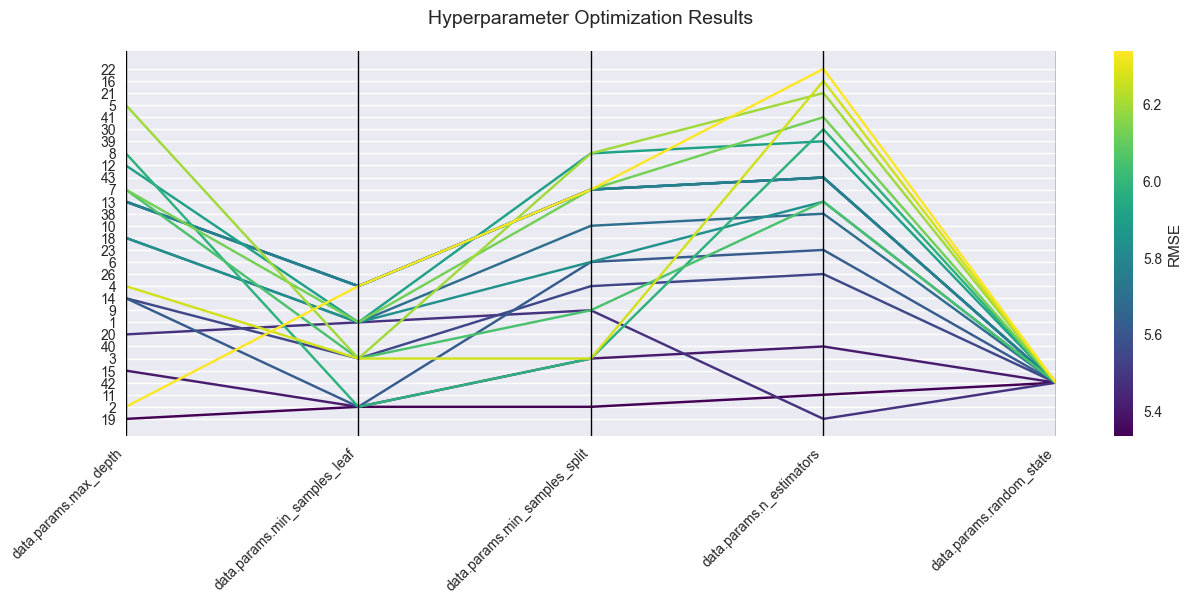

In [113]:
df_sorted = df[df.columns[columns]].sort_values('data.metrics.rmse')

rmse_values = df_sorted['data.metrics.rmse']
norm = plt.Normalize(rmse_values.min(), rmse_values.max())
cmap = cm.viridis 

fig, ax = plt.subplots(figsize=(15, 5))

pd.plotting.parallel_coordinates(
    df_sorted,#.drop(columns=['data.metrics.rmse']), 
    class_column='data.metrics.rmse',  
    colormap=cmap, 
    ax=ax,
)

ax.legend().set_visible(False)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=1)

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('RMSE')

plt.title('Hyperparameter Optimization Results', fontsize=14, pad=20)

In [115]:
df_sorted.iloc[0]

data.metrics.rmse                5.33542
data.params.max_depth                 19
data.params.min_samples_leaf           2
data.params.min_samples_split          2
data.params.n_estimators              11
data.params.random_state              42
Name: 4, dtype: object

## Q6. Promote the best model to the model registry
---
The results from the hyperparameter optimization are quite good. So, we can assume that we are ready to test some of these models in production. In this exercise, you'll promote the best model to the model registry. We have prepared a script called register_model.py, which will check the results from the previous step and select the top 5 runs. After that, it will calculate the RMSE of those models on the test set (March 2023 data) and save the results to a new experiment called random-forest-best-models.

Your task is to update the script register_model.py so that it selects the model with the lowest RMSE on the test set and registers it to the model registry.

Tip 1: you can use the method search_runs from the MlflowClient to get the model with the lowest RMSE,

Tip 2: to register the model you can use the method mlflow.register_model and you will need to pass the right model_uri in the form of a string that looks like this: "runs:/<RUN_ID>/model", and the name of the model (make sure to choose a good one!).

What is the test RMSE of the best model?

* ~~5.060~~
* **5.567**
* ~~6.061~~
* ~~6.568~~

In [117]:
! python ./homework/register_model.py --help

Usage: register_model.py [OPTIONS]

Options:
  --data_path TEXT  Location where the processed NYC taxi trip data was saved
  --top_n INTEGER   Number of top models that need to be evaluated to decide
                    which one to promote
  --help            Show this message and exit.


2025/05/25 23:45:54 INFO mlflow.tracking.fluent: Experiment with name 'random-forest-best-models' does not exist. Creating a new experiment.


In [31]:
import os
os.environ['PYTHONIOENCODING'] = 'utf-8'

In [36]:
! python ./homework/register_model.py --data_path ../data/output

ðŸ�ƒ View run fun-loon-613 at: http://127.0.0.1:5000/#/experiments/2/runs/9017bb609174441d870abf9f5d880ff4
ðŸ§ª View experiment at: http://127.0.0.1:5000/#/experiments/2
ðŸ�ƒ View run nosy-skunk-925 at: http://127.0.0.1:5000/#/experiments/2/runs/f2b1d1a8fcd14344b65e820f326f773c
ðŸ§ª View experiment at: http://127.0.0.1:5000/#/experiments/2
ðŸ�ƒ View run fearless-colt-141 at: http://127.0.0.1:5000/#/experiments/2/runs/1a920e7cb0a64ff7ae2e5552601ff798
ðŸ§ª View experiment at: http://127.0.0.1:5000/#/experiments/2
ðŸ�ƒ View run dazzling-hare-19 at: http://127.0.0.1:5000/#/experiments/2/runs/0f968b2248e442e386581359dc99d298
ðŸ§ª View experiment at: http://127.0.0.1:5000/#/experiments/2
ðŸ�ƒ View run rare-kit-211 at: http://127.0.0.1:5000/#/experiments/2/runs/1921f0f0c4d54d5da58d8e54d29f5a19
ðŸ§ª View experiment at: http://127.0.0.1:5000/#/experiments/2


2025/05/26 01:54:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/05/26 01:54:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/05/26 01:54:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/05/26 01:55:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/05/26 01:55:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registe

In [53]:
client.search_experiments()

[<Experiment: artifact_location='file:///c:/Users/Gleb/work/courses/2025-05-12_mlops-course/mlops-zoomcamp-homework/02-experiment-tracking/mlflow/artifacts/2', creation_time=1748205954662, experiment_id='2', last_update_time=1748205954662, lifecycle_stage='active', name='random-forest-best-models', tags={}>,
 <Experiment: artifact_location='file:///c:/Users/Gleb/work/courses/2025-05-12_mlops-course/mlops-zoomcamp-homework/02-experiment-tracking/mlflow/artifacts/1', creation_time=1748201578163, experiment_id='1', last_update_time=1748201578163, lifecycle_stage='active', name='random-forest-hyperopt', tags={}>,
 <Experiment: artifact_location='file:///c:/Users/Gleb/work/courses/2025-05-12_mlops-course/mlops-zoomcamp-homework/02-experiment-tracking/mlflow/artifacts/0', creation_time=1748200950626, experiment_id='0', last_update_time=1748200950626, lifecycle_stage='active', name='Default', tags={}>]

In [54]:
experiment = client.get_experiment_by_name("random-forest-best-models")
experiment, experiment.experiment_id

(<Experiment: artifact_location='file:///c:/Users/Gleb/work/courses/2025-05-12_mlops-course/mlops-zoomcamp-homework/02-experiment-tracking/mlflow/artifacts/2', creation_time=1748205954662, experiment_id='2', last_update_time=1748205954662, lifecycle_stage='active', name='random-forest-best-models', tags={}>,
 '2')

In [55]:
runs = client.search_runs(experiment.experiment_id)
len(runs), runs[0]

(5,
 <Run: data=<RunData: metrics={'test_rmse': 5.5941605655803635,
  'training_mean_absolute_error': 3.323916924052877,
  'training_mean_squared_error': 26.08294493276463,
  'training_r2_score': 0.6796805248104354,
  'training_root_mean_squared_error': 5.107146456952711,
  'training_score': 0.6796805248104354,
  'val_rmse': 5.3633599989832135}, params={'bootstrap': 'True',
  'ccp_alpha': '0.0',
  'criterion': 'squared_error',
  'max_depth': '14',
  'max_features': '1.0',
  'max_leaf_nodes': 'None',
  'max_samples': 'None',
  'min_impurity_decrease': '0.0',
  'min_samples_leaf': '2',
  'min_samples_split': '6',
  'min_weight_fraction_leaf': '0.0',
  'monotonic_cst': 'None',
  'n_estimators': '23',
  'n_jobs': 'None',
  'oob_score': 'False',
  'random_state': '42',
  'verbose': '0',
  'warm_start': 'False'}, tags={'estimator_class': 'sklearn.ensemble._forest.RandomForestRegressor',
  'estimator_name': 'RandomForestRegressor',
  'mlflow.log-model.history': '[{"run_id": "1921f0f0c4d54d5da

In [56]:
for run in runs:
    print(f"{run.info.run_id = }, {run.data.metrics['test_rmse'] = :.4f}")

run.info.run_id = '1921f0f0c4d54d5da58d8e54d29f5a19', run.data.metrics['test_rmse'] = 5.5942
run.info.run_id = '0f968b2248e442e386581359dc99d298', run.data.metrics['test_rmse'] = 5.5895
run.info.run_id = '1a920e7cb0a64ff7ae2e5552601ff798', run.data.metrics['test_rmse'] = 5.5921
run.info.run_id = 'f2b1d1a8fcd14344b65e820f326f773c', run.data.metrics['test_rmse'] = 5.5853
run.info.run_id = '9017bb609174441d870abf9f5d880ff4', run.data.metrics['test_rmse'] = 5.5674


In [57]:
df = pd.json_normalize([i.to_dictionary() for i in runs])

In [58]:
df[['info.run_id']+list(df.columns[df.columns.str.contains('data.metrics')])].sort_values('data.metrics.test_rmse')

,info.run_id,data.metrics.training_mean_squared_error,data.metrics.training_mean_absolute_error,data.metrics.training_r2_score,data.metrics.training_root_mean_squared_error,data.metrics.training_score,data.metrics.val_rmse,data.metrics.test_rmse
4,9017bb609174441d870abf9f5d880ff4,24.785660,3.233657,0.695612,4.978520,0.695612,5.335420,5.567408
3,f2b1d1a8fcd14344b65e820f326f773c,25.689000,3.299143,0.684518,5.068432,0.684518,5.354695,5.585312
1,0f968b2248e442e386581359dc99d298,26.271434,3.321008,0.677366,5.125567,0.677366,5.357491,5.589460
2,1a920e7cb0a64ff7ae2e5552601ff798,24.202383,3.248758,0.702775,4.919592,0.702775,5.355042,5.592132
0,1921f0f0c4d54d5da58d8e54d29f5a19,26.082945,3.323917,0.679681,5.107146,0.679681,5.363360,5.594161


In [59]:
best_run = client.search_runs(
    experiment_ids = experiment.experiment_id, 
    max_results = 1,
    order_by = ['metrics.test_rmse ASC'])[0]

best_run

<Run: data=<RunData: metrics={'test_rmse': 5.567408012462019,
 'training_mean_absolute_error': 3.23365652419934,
 'training_mean_squared_error': 24.785660360279664,
 'training_r2_score': 0.6956122194293166,
 'training_root_mean_squared_error': 4.978519896543516,
 'training_score': 0.6956122194293166,
 'val_rmse': 5.335419588556921}, params={'bootstrap': 'True',
 'ccp_alpha': '0.0',
 'criterion': 'squared_error',
 'max_depth': '19',
 'max_features': '1.0',
 'max_leaf_nodes': 'None',
 'max_samples': 'None',
 'min_impurity_decrease': '0.0',
 'min_samples_leaf': '2',
 'min_samples_split': '2',
 'min_weight_fraction_leaf': '0.0',
 'monotonic_cst': 'None',
 'n_estimators': '11',
 'n_jobs': 'None',
 'oob_score': 'False',
 'random_state': '42',
 'verbose': '0',
 'warm_start': 'False'}, tags={'estimator_class': 'sklearn.ensemble._forest.RandomForestRegressor',
 'estimator_name': 'RandomForestRegressor',
 'mlflow.log-model.history': '[{"run_id": "9017bb609174441d870abf9f5d880ff4", '
            

In [60]:
best_run.data.metrics

{'training_mean_squared_error': 24.785660360279664,
 'training_mean_absolute_error': 3.23365652419934,
 'training_r2_score': 0.6956122194293166,
 'training_root_mean_squared_error': 4.978519896543516,
 'training_score': 0.6956122194293166,
 'val_rmse': 5.335419588556921,
 'test_rmse': 5.567408012462019}

In [61]:
best_run.info.run_id

'9017bb609174441d870abf9f5d880ff4'

In [46]:
print(f"{best_run.data.metrics['test_rmse'] = :.4f}")

best_run.data.metrics['test_rmse'] = 5.5674


In [47]:
best_run.info.artifact_uri

'file:///c:/Users/Gleb/work/courses/2025-05-12_mlops-course/mlops-zoomcamp-homework/02-experiment-tracking/mlflow/artifacts/2/9017bb609174441d870abf9f5d880ff4/artifacts'

In [48]:
best_run.info.run_id

'9017bb609174441d870abf9f5d880ff4'

In [50]:
# from mlflow.tracking import MlflowClient

# client = MlflowClient("http://127.0.0.1:5000")

# run_id = best_run.info.run_id 
# model_uri = f"runs:/{run_id}/model"  
# model_name = "best_model"

# try:
#     registered_model = client.create_registered_model(model_name)
#     print(f"New model registered: {model_name}")
# except mlflow.exceptions.MlflowException as e:
#     print(f"The model '{model_name}' already exist")

In [51]:
client.search_registered_models()

[<RegisteredModel: aliases={}, creation_timestamp=1748213715201, description='', last_updated_timestamp=1748213715237, latest_versions=[<ModelVersion: aliases=[], creation_timestamp=1748213715237, current_stage='None', description='', last_updated_timestamp=1748213715237, name='best_model', run_id='9017bb609174441d870abf9f5d880ff4', run_link='', source='file:///c:/Users/Gleb/work/courses/2025-05-12_mlops-course/mlops-zoomcamp-homework/02-experiment-tracking/mlflow/artifacts/2/9017bb609174441d870abf9f5d880ff4/artifacts/model', status='READY', status_message=None, tags={}, user_id='', version='1'>], name='best_model', tags={}>]

In [52]:
# client.delete_registered_model('best_model')

## Submit the results
---
* Submit your results here: https://courses.datatalks.club/mlops-zoomcamp-2025/homework/hw2
* If your answer doesn't match options exactly, select the closest one